# Employee Review Analysis - Part 1 EDA

#### Dataset:
This dataset is about a company's employee review and it was scrapped from Glassdoor. The usage of this datset has been approved by Glassdoor in written.

### 1. Load the Data

In [1]:
import pandas as pd

# use the first column as index, parse 'Comment Datetime' to datetime object
df = pd.read_csv('company1_review.csv',index_col=[0], parse_dates=['Comment Datetime']) 
df.head()

,Con,Career Opportunities,Author Location,Summary,Senior Management,Pro,Recommendation,Culture & Values,Author Years,Overall Rating,Compensation and Benefits,Author Title,Work/Life Balance,Comment Datetime
0,- potentially slow upward movement beyond the ...,5.0,"Salt Lake City, UT","""Awesome Culture""",4.0,- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",5.0,I have been working at Anonymous Investments f...,5.0,5.0,Current Employee - Investment Solutions Repres...,5.0,2020-06-18
1,Few jobs are off the phones. Call after call g...,NaN,NaN,"""Great job""",NaN,"Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",NaN,I have been working at Anonymous Investments f...,5.0,NaN,Current Employee - Investment Solutions Repres...,NaN,2020-06-16
2,"Phone call center, must be good on the phones.",5.0,"American Fork, UT","""Great place to work""",4.0,"Excellent benefits, plenty of opportunity to a...",NaN,5.0,I worked at Anonymous Investments full-time fo...,5.0,5.0,Former Employee - High Net Worth Service Assoc...,5.0,2020-06-17
3,Easy to get fired. They don’t always give warn...,4.0,NaN,"""Good environment, not so stable.""",3.0,"Good environment \n\nNice scenery, cafeteria, ...",Recommends,3.0,I worked at Anonymous Investments full-time,4.0,5.0,Former Employee - Financial Associate,3.0,2020-06-11
4,No cons in my opinion,5.0,"Los Angeles, CA","""Great company""",4.0,Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",5.0,I worked at Anonymous Investments full-time,5.0,4.0,Former Employee - Investment Consultant,5.0,2020-06-11


In [2]:
df.shape

(6675, 14)

In [3]:
df.columns

Index(['Con', 'Career Opportunities', 'Author Location', 'Summary',
       'Senior Management', 'Pro', 'Recommendation', 'Culture & Values',
       'Author Years', 'Overall Rating', 'Compensation and Benefits',
       'Author Title', 'Work/Life Balance', 'Comment Datetime'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6674
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Con                        6675 non-null   object        
 1   Career Opportunities       5952 non-null   float64       
 2   Author Location            4054 non-null   object        
 3   Summary                    6675 non-null   object        
 4   Senior Management          5915 non-null   float64       
 5   Pro                        6675 non-null   object        
 6   Recommendation             5776 non-null   object        
 7   Culture & Values           5097 non-null   float64       
 8   Author Years               6675 non-null   object        
 9   Overall Rating             6675 non-null   float64       
 10  Compensation and Benefits  5961 non-null   float64       
 11  Author Title               5649 non-null   object        
 12  Work/L

### 2. Data Cleaning

#### Handle Missing Values in Numerical Ratings
First, we fill the missing ratings with each column's median ratings.

In [5]:
# separate the dataframes into 2 parts: numerical rating columns and string columns

rating_columns = df.select_dtypes(include = ['float64'])
string_columns = df.select_dtypes(exclude = ['float64'])

In [6]:
# fill missing rating values with median ratings

rating_columns = rating_columns.fillna(round(rating_columns.median(),1))
rating_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6674
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Career Opportunities       6675 non-null   float64
 1   Senior Management          6675 non-null   float64
 2   Culture & Values           6675 non-null   float64
 3   Overall Rating             6675 non-null   float64
 4   Compensation and Benefits  6675 non-null   float64
 5   Work/Life Balance          6675 non-null   float64
dtypes: float64(6)
memory usage: 365.0 KB


In [7]:
# combine the 2 subset dataframes into 1 dataframe

df_rating_filled = pd.concat([string_columns,rating_columns], axis = 1)
df_rating_filled.head()

,Con,Author Location,Summary,Pro,Recommendation,Author Years,Author Title,Comment Datetime,Career Opportunities,Senior Management,Culture & Values,Overall Rating,Compensation and Benefits,Work/Life Balance
0,- potentially slow upward movement beyond the ...,"Salt Lake City, UT","""Awesome Culture""",- awesome introduction into finance (no prior ...,"Recommends,Positive Outlook,Approves of CEO",I have been working at Anonymous Investments f...,Current Employee - Investment Solutions Repres...,2020-06-18,5.0,4.0,5.0,5.0,5.0,5.0
1,Few jobs are off the phones. Call after call g...,NaN,"""Great job""","Great benefits, great people. Work from home f...","Recommends,Positive Outlook,Approves of CEO",I have been working at Anonymous Investments f...,Current Employee - Investment Solutions Repres...,2020-06-16,3.5,3.0,4.0,5.0,4.0,4.0
2,"Phone call center, must be good on the phones.","American Fork, UT","""Great place to work""","Excellent benefits, plenty of opportunity to a...",NaN,I worked at Anonymous Investments full-time fo...,Former Employee - High Net Worth Service Assoc...,2020-06-17,5.0,4.0,5.0,5.0,5.0,5.0
3,Easy to get fired. They don’t always give warn...,NaN,"""Good environment, not so stable.""","Good environment \n\nNice scenery, cafeteria, ...",Recommends,I worked at Anonymous Investments full-time,Former Employee - Financial Associate,2020-06-11,4.0,3.0,3.0,4.0,5.0,3.0
4,No cons in my opinion,"Los Angeles, CA","""Great company""",Good work environment in my opinion,"Recommends,Positive Outlook,Approves of CEO",I worked at Anonymous Investments full-time,Former Employee - Investment Consultant,2020-06-11,5.0,4.0,5.0,5.0,4.0,5.0


Next, we are going to check the string columns.

In [8]:
# print out the first 3 records that have text

for i in range(3):
    print(df['Author Years'][i])
    print(df['Author Title'][i])
    print(df['Summary'][i])
    print(df['Pro'][i])
    print(df['Con'][i])
    print('====================')

I have been working at Anonymous Investments full-time for more than a year
Current Employee - Investment Solutions Representative
"Awesome Culture"
- awesome introduction into finance (no prior experience or related education) 

- respected and appreciated

- good compensation
- potentially slow upward movement beyond the first promotion
I have been working at Anonymous Investments full-time for more than 3 years
Current Employee - Investment Solutions Representative
"Great job"
Great benefits, great people. Work from home flexibility.
Few jobs are off the phones. Call after call gets repetitive and exhausting.
I worked at Anonymous Investments full-time for more than 5 years
Former Employee - High Net Worth Service Associate
"Great place to work"
Excellent benefits, plenty of opportunity to add skills and advance to other roles.
Phone call center, must be good on the phones.


#### Extract Categorical Information

1. Extract information of 'Current/Former Employee' and 'Full-time/Part-time Employee' from column 'Author Year'. 

Of note, there is a column'Author Title" which has part of "Current Employee" or "Former Employee" information, but there are more than 2000 null values. The other column "Author Years" column has no null values and the text contains relevant information about current/former employee flags, notice the string starts with either "I have been working" or "I worked at".Hence, we will use "Author Year" to extract employee type data. 

For full-time / part-time flags, we will get that information from "Author Years" column as well. If this information is not specified, we will default it to full-time. 

2. Extract job title or job family from column 'Author Title'.

3. Extract employee tenure from column 'Author Years'.

Take a look at the sample data:

"I have been working at Anonymous Investments full-time for more than a year"<br>
"I have been working at Anonymous Investments full-time for more than 3 years"<br>
"I worked at Anonymous Investments full-time for more than 5 years"

Notice there are 3 different patterns.There could be a number before year(s)(i.e. 3 years) or a letter before year (i.e. 'a year') or 'more than/less than'.

First, we will replace 'a year' as '1 year', then find all 'more than/less than'. If there is 'more than', we will add 0.5 year to the number of year, if there is 'less than', we will minus 0.5 year from the numer of years. If no tenure is specified, we will set it to 0, because there are 2979 NaN values, we can't drop so many data.

In [9]:
# define a function to extract categorical information

import numpy as np
import re

def extract_cat_data(row):
    
    # 1. extract current/former employee flags from'Author Years'
    if not pd.isna(row['Author Years']):
        if "have been working" in row['Author Years']:
            row['Current Employee'] = 1
        elif "I worked at" in row['Author Years']:
            row['Current Employee'] = 0
        else:
            row['Current Employee'] = Np.Nan          
    
    
    # 2. extract tenure from 'Author Years'
    string_to_number = row["Author Years"].replace("a year", "1 year")   # replace 'a year' with '1 year'
    tenure = re.findall(r'\d+', string_to_number)  # find the digit in the string
    
    if tenure: 
        row['Tenure'] = int(tenure[0])             # use the number in the list
        if 'more than' in row["Author Years"]:     # add 0.5 years if there is 'more than'
            row['Tenure'] += 0.5       
        elif 'less than' in row["Author Years"]:   # minus 0.5 years if there is 'less than'
            row['Tenure'] -=0.5 
    else:
        row['Tenure'] = 0                          # if no tenure is specified, set to 0
    
    # 3. extract full-time/part-time flags from 'Author Years'
    if 'full-time' in string_to_number or 'full time' in string_to_number:
        row['Full-time'] = 1
    elif 'part-time' in string_to_number or 'part time' in string_to_number:
        row['Full-time'] = 0
    else:
        row['Full-time'] = 1                       # if not specified, set it to 1 (default to full time)
    
    
    # 4. extract 'Recommended','Positive Outlook','Approves of CEO' from column'Recommendation' 
    row['Recommended'] = 0
    row['Positive Outlook'] = 0
    row['Approves of CEO'] = 0
    
    if not pd.isna(row['Recommendation']):
        if 'Recommends' in row['Recommendation']:
            row['Recommended'] = 1
        elif "Doesn't Recommend" in row['Recommendation']:
            row['Recommended'] = -1
        
        elif 'Positive Outlook' in row['Recommendation']:
            row['Positive Outlook'] = 1
        elif 'Negative Outlook' in row['Recommendation']:   
            row['Positive Outlook'] = -1
        elif 'Neutral Outlook' in row['Recommendation']: 
            row['Positive Outlook'] = 0
            
        elif 'Approves of CEO' in row['Recommendation']:
            row['Approves of CEO'] = 1
        elif 'Disapproves of CEO' in row['Recommendation']:
            row['Approves of CEO'] = -1
        elif 'No opinion of CEO' in row['Recommendation']:   
            row['Approves of CEO'] = 0

    return row

df_cal_extracted = df_rating_filled.apply(extract_cat_data, axis=1)

In [10]:
df_cal_extracted.drop(columns='Recommendation',inplace=True)

#### Handle Missing Values in Categorical Columns

In [11]:
df_cal_extracted.isnull().sum()

Con                             0
Author Location              2621
Summary                         0
Pro                             0
Author Years                    0
Author Title                 1026
Comment Datetime                0
Career Opportunities            0
Senior Management               0
Culture & Values                0
Overall Rating                  0
Compensation and Benefits       0
Work/Life Balance               0
Current Employee                0
Tenure                          0
Full-time                       0
Recommended                     0
Positive Outlook                0
Approves of CEO                 0
dtype: int64

There are 2621 missing locations and 1026 missing job titles, since different branches and different job families are likely to have different employee satisfactions, we don't want to drop these columns, instead we will fill in the missing locations as "NA" and interpolate the missing job titles with "Anonymous Job".

In [12]:
import re

def extract_loc_job(row):
    # extract locations
    if not pd.isna(row['Author Location']):
        if re.search(r'[A-Z]{2}$',row['Author Location']):       # extract the last 2 captical letters as state
            row['State'] = re.search(r'[A-Z]{2}$',row['Author Location'])[0]
        else:
            row['State'] = 'NA'      
    else:
            row['State'] = 'NA'      # fill missing state as 'NA'
    
    # extract job title
    if not pd.isna(row['Author Title']): 
        if '-'in row['Author Title']:
            row['Job Title'] = row['Author Title'].split("-")[1]    # get the 2nd element after the split
        else:
            row['Job Title'] = row['Author Title']
    else:
         row['Job Title'] = 'Anonymous Job'
    
    return row      
            
df_loc_job_filled = df_cal_extracted.apply(extract_loc_job,axis=1)    

In [13]:
df_not_null = df_loc_job_filled.drop(columns = ['Author Title','Author Years','Author Location'])

#### Reorder Columns
Rearrange columns to make categorical columns together and rating columns together.

In [14]:
# Reorder the columns

df_cleaned = df_not_null[['Comment Datetime', 'State', 'Job Title','Tenure','Current Employee','Full-time',
                          'Summary','Pro','Con','Recommended', 'Positive Outlook','Approves of CEO',
                          'Overall Rating','Career Opportunities','Compensation and Benefits',
                          'Work/Life Balance','Senior Management','Culture & Values']]

In [15]:
# set 'Comment Datetime' as index

df_cleaned.set_index('Comment Datetime',inplace=True)

In [16]:
# set dataframe by index

df_cleand = df_cleaned.sort_index()
df_cleaned.head(1)

,State,Job Title,Tenure,Current Employee,Full-time,Summary,Pro,Con,Recommended,Positive Outlook,Approves of CEO,Overall Rating,Career Opportunities,Compensation and Benefits,Work/Life Balance,Senior Management,Culture & Values
Comment Datetime,,,,,,,,,,,,,,,,,
2020-06-18,UT,Investment Solutions Representative,1.5,1,1,"""Awesome Culture""",- awesome introduction into finance (no prior ...,- potentially slow upward movement beyond the ...,1,0,0,5.0,5.0,5.0,5.0,4.0,5.0


In [17]:
# verify if all missing values are filled

assert (df_cleaned.notnull().all()).bool

Now all columns are complete with no missing values. Nex, we will do some exploratory analysis.

### 3. Exploratory Data Analysis

In [18]:
df_cleaned.describe()

,Tenure,Current Employee,Full-time,Recommended,Positive Outlook,Approves of CEO,Overall Rating,Career Opportunities,Compensation and Benefits,Work/Life Balance,Senior Management,Culture & Values
count,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000,6675.000000
mean,2.448390,0.562247,0.993109,0.424719,0.003596,0.015730,3.712659,3.435281,3.852285,3.753333,3.198951,3.877004
std,3.380078,0.496147,0.082734,0.789590,0.084730,0.159293,1.111473,1.113370,0.957898,1.084262,1.187210,1.075096
min,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,2.500000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,3.500000,4.000000,4.000000,3.000000,4.000000
75%,3.500000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000
max,10.500000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000



Bad key "text.kerning_factor" on line 4 in
c:\anaconda3\envs\py36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


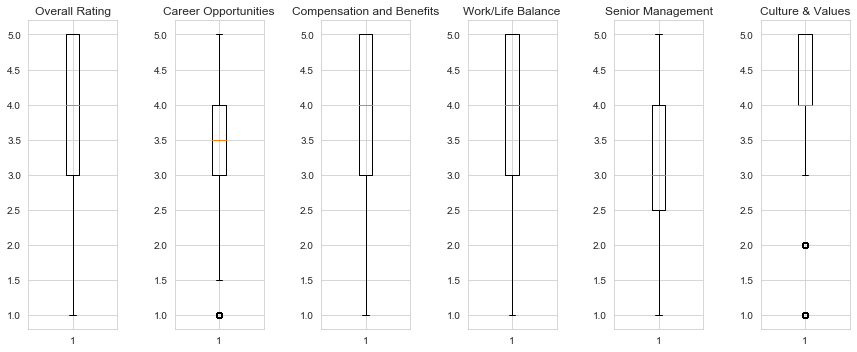

In [19]:
# plot all ratings using boxplots

import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("whitegrid")

column_list = ['Overall Rating','Career Opportunities','Compensation and Benefits',
               'Work/Life Balance','Senior Management','Culture & Values']

figure, ax = plt.subplots(1,6,figsize=(12,5))  

for column, curr_ax in zip(column_list, ax.ravel()):  # use ax.ravel() to flatten ax(2 by 3) in order to zip
    curr_ax.boxplot(df_cleaned[column])       
    curr_ax.set_title(f'{column}')

plt.tight_layout()
plt.show() 

On a scale of 1-5, this company's median overall rating is 4 which is pretty good. Breaking down to 5 categories, employees rated the highest in compensation & benefits and work/life balance. Career opportunities'median rating is 3.5. Senior management rating's median value is 3. Culture & Values has a median rating as 4 but there are a few outliers who rated it pretty low.

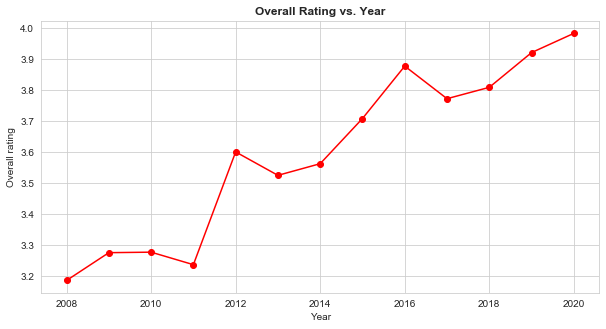

In [20]:
# plot overall rating over the years

from datetime import datetime
fig,ax = plt.subplots(figsize=(10,5))

x = sorted(df_cleaned.index.year.unique())
y = df_cleaned.groupby(df_cleaned.index.year)['Overall Rating'].mean()

ax.plot(x, y, color='red', marker = 'o',label='Overall Rating')
ax.set_title('Overall Rating vs. Year', fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Overall rating')
plt.show()                                    

There is a clear trend that the employee satisfaction has been increasing since 2008 with some small dips in 2011, 2013 and 2017.

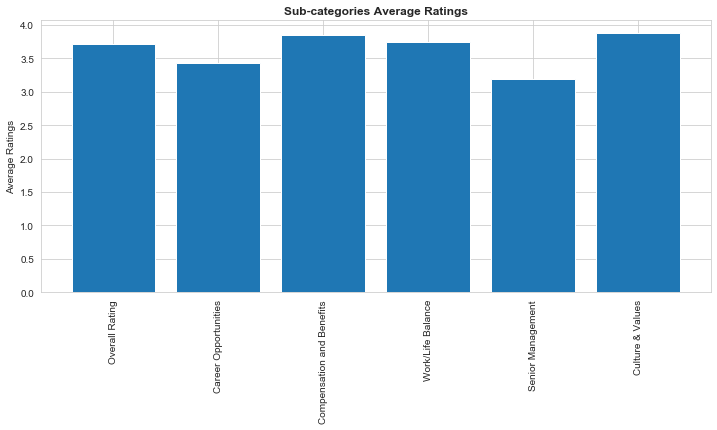

In [21]:
column_list = ['Overall Rating','Career Opportunities','Compensation and Benefits',
               'Work/Life Balance','Senior Management','Culture & Values']

sub_ratings = df_cleaned[column_list].mean()

figure, ax = plt.subplots(figsize=(12,5))  
ax.bar(sub_ratings.index, sub_ratings)

ax.set_title ('Sub-categories Average Ratings', fontweight='bold')
ax.set_ylabel ('Average Ratings')
ax.set_xticklabels(sub_ratings.index,rotation=90)
plt.show() 

In [22]:
total_states = df_cleaned.State.nunique()
print(f'Total unique states in the data: {total_states}')

Total unique states in the data: 39


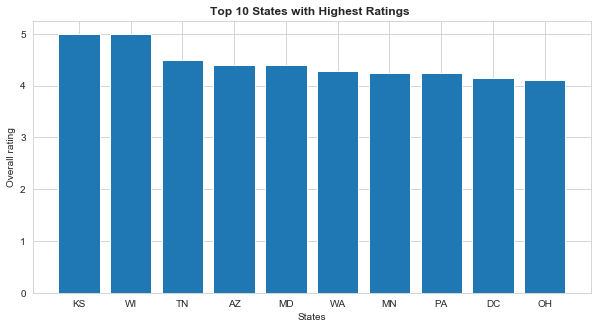

In [23]:
# plot the 10 states with top ratings 

top_10 = df_cleaned.groupby('State')['Overall Rating'].mean().nlargest(10)

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(top_10.index,top_10)
ax.set_title('Top 10 States with Highest Ratings ', fontweight='bold')
ax.set_xlabel('States')
ax.set_ylabel('Overall rating')
plt.show()

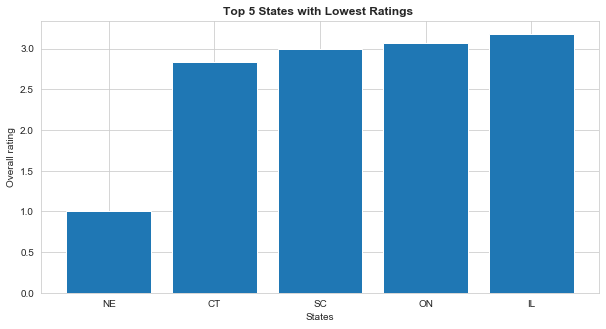

In [24]:
# plot the 5 states with lowest ratings 

lowest_5 = df_cleaned.groupby('State')['Overall Rating'].mean().nsmallest(5)

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(lowest_5.index,lowest_5)
ax.set_title('Top 5 States with Lowest Ratings ', fontweight='bold')
ax.set_xlabel('States')
ax.set_ylabel('Overall rating')
plt.show()

Looks like employees in KS and WI have the highest employee satisfaction and employees in NE are the unhappest. Of note, the location data indicates 'Author Location', we assumed these employees are based locally in the company's branches in that particular state. If there are substantial remote employees, this conclusion may not be accurate. 

In [25]:
df_cleaned.groupby('Full-time')['Overall Rating'].mean()

Full-time
0    4.195652
1    3.709308
Name: Overall Rating, dtype: float64

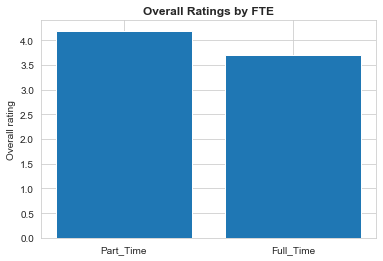

In [26]:
# plot overall rating by full-time/part-time employee

rate_by_fte = df_cleaned.groupby('Full-time')['Overall Rating'].mean()

fig, ax = plt.subplots()
ax.bar(['Part_Time', 'Full_Time'], rate_by_fte)
ax.set_title('Overall Ratings by FTE', fontweight='bold')
ax.set_ylabel('Overall rating')
plt.show()

Part-time employees have higher satisfaction than full-time employees.

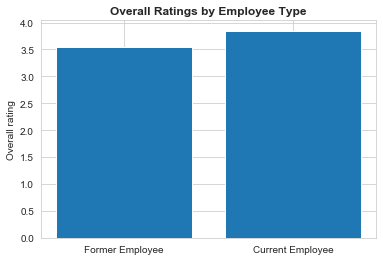

In [27]:
# plot overall rating by current/former employee

rate_by_emp_type = df_cleaned.groupby('Current Employee')['Overall Rating'].mean()

fig, ax = plt.subplots()
ax.bar(['Former Employee', 'Current Employee'], rate_by_emp_type)
ax.set_title('Overall Ratings by Employee Type', fontweight='bold')
ax.set_ylabel('Overall rating')
plt.show()

Former employees gave relatively lower ratings than current employees, this is understandable because unhappy employees tend to leave.

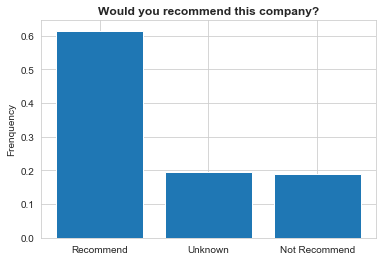

In [28]:
# plot overall recommendations

rec_count = df_cleaned['Recommended'].value_counts(normalize=True)

fig, ax = plt.subplots()
ax.bar(['Recommend', 'Unknown','Not Recommend'], rec_count)
ax.set_title('Would you recommend this company?', fontweight='bold')
ax.set_ylabel('Frenquency')
plt.show()

Overall, 60% employees recommended this company, 20% do not recommend, another 20% does not answer this question.

In [29]:
df_cleaned.to_csv('df_cleaned.csv')